# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://openweathermap.org/weathermap?basemap=map&cities=true&layer=temperature&lat=30&lon=-20&zoom=5"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://openweathermap.org/weathermap?basemap=map&cities=true&layer=temperature&lat=30&lon=-20&zoom=5" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(f'{city_url}&q={city}').json()
        city_weather = city_data.append(response['name'])
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lats.append(response['coord']['lat'])
        city_lng = lngs.append(response['coord']['lon'])
        city_max_temp = city_max_temp.append(response['main']['temp_max'])
        city_humidity = city_humidity.append(response['main']['humidity'])
        city_clouds = city_clouds.append(response['clouds']['all'])
        city_wind = city_wind.append(response['wind']['speed'])
        city_country = city_country.append(response['sys']['country'])
        city_date = city_data.append(response['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | areka
City not found. Skipping...
Processing Record 2 of Set 1 | dikson
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
City not found. Skipping...
Processing Record 4 of Set 1 | khatanga
City not found. Skipping...
Processing Record 5 of Set 1 | auki
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
City not found. Skipping...
Processing Record 7 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 8 of Set 1 | katsuura
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 10 of Set 1 | wanning
City not found. Skipping...
Processing Record 11 of Set 1 | rio pardo de minas
City not found. Skipping...
Processing Record 12 of Set 1 | mitsamiouli
City not found. Skipping...
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | lingao
City 

In [8]:
city_data_df = pd.read_csv('C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/cities.csv')
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...,...
572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


In [53]:
# Create values dictionary from API call lists.
city_data = {
    "City": city, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

NameError: name 'city' is not defined

In [10]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

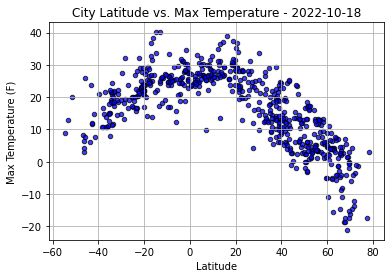

In [19]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature - 2022-10-18')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

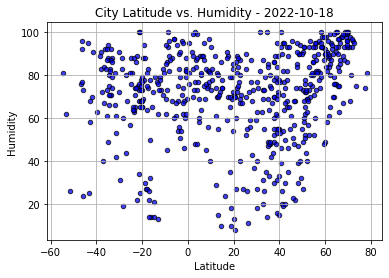

In [20]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity - 2022-10-18')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

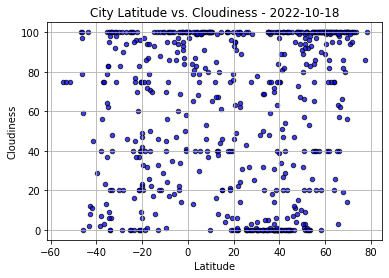

In [21]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - 2022-10-18')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

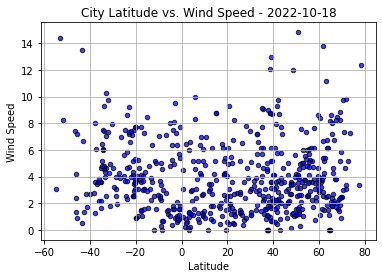

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed - 2022-10-18')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Downloads/python_api_challenge/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def makeLinRegression(df, x_Col, y_Col):
    # linear regression on data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    # linear regression line x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} ({})"
                        .format(y_Col, x_Col, city_data_df["Datetime (Local)"].iloc[0].split(",")[0]))

    df_axes.plot(regr_line_x, regr_line_y, 'r')

    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    return df_axes

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

city_left_count = len(city_data_df)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_cities = len(northern_hemi_df)
print("There are {} cities in the southern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(northern_cities, city_left_count, (northern_cities/city_left_count)))

# Display sample data
northern_hemi_df.head()


There are 394 cities in the southern hemisphere out of 577 cities total, representing 68.3% of all cities in the data set.


,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
city_left_count = len(city_data_df)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_cities = len(southern_hemi_df)
print("There are {} cities in the southern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(southern_cities, city_left_count, (southern_cities/city_left_count)))

# Display sample data
southern_hemi_df.head()

There are 183 cities in the southern hemisphere out of 577 cities total, representing 31.7% of all cities in the data set.


,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The equation of the best-fit linear regression line for this chart is y=-0.51x+33.71
The r-squared correlation coefficient for this line is -0.85


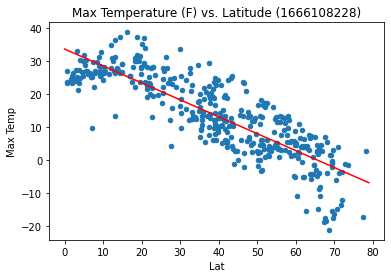

In [32]:
# Linear regression on Northern Hemisphere

(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemi_df["Lat"], 
                                                           northern_hemi_df["Max Temp"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Max Temp", 
                 title="Max Temperature (F) vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_N_Hemisphere.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The equation of the best-fit linear regression line for this chart is y=0.08x+69.45
The r-squared correlation coefficient for this line is 0.12


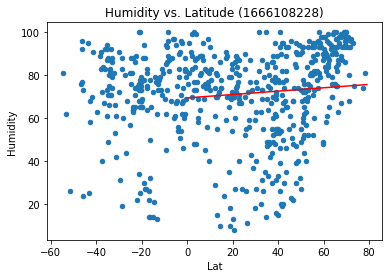

In [47]:
# Linear regression on Southern Hemisphere
(temp_slope, temp_intercept, temp_r_val, _, _) = linregress(city_data_df["Lat"], 
                                                           city_data_df["Humidity"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = temp_slope * regr_line_x + temp_intercept

temp_axes = city_data_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Humidity", 
                 title="Humidity vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(temp_slope, temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(temp_r_val))
temp_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_S_Hemisphere.png")


The equation of the best-fit linear regression line for this chart is y=0.26x+61.28
The r-squared correlation coefficient for this line is 0.24


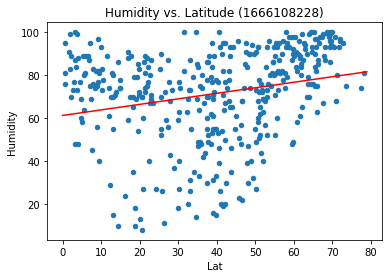

In [48]:
# Northern Hemisphere
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemi_df["Lat"], 
                                                           northern_hemi_df["Humidity"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Humidity", 
                 title="Humidity vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_N_Hemisphere.png")


The equation of the best-fit linear regression line for this chart is y=0.03x+70.73
The r-squared correlation coefficient for this line is 0.02


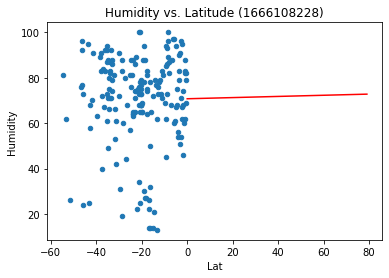

In [46]:
# Southern Hemisphere
(s_temp_slope, s_temp_intercept, s_temp_r_val, _, _) = linregress(southern_hemi_df["Lat"], 
                                                           southern_hemi_df["Humidity"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

s_temp_axes = southern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Humidity", 
                 title="Humidity vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

s_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_temp_slope, s_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_temp_r_val))
s_temp_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_S_Hemisphere.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The equation of the best-fit linear regression line for this chart is y=0.31x+48.50
The r-squared correlation coefficient for this line is 0.16


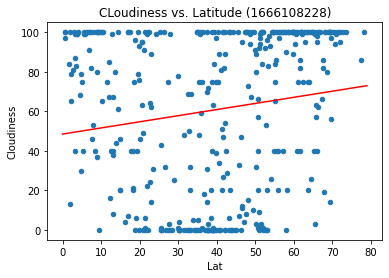

In [49]:
# Northern Hemisphere
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemi_df["Lat"], 
                                                           northern_hemi_df["Cloudiness"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Cloudiness", 
                 title="CLoudiness vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_N_Hemisphere.png")


The equation of the best-fit linear regression line for this chart is y=0.39x+67.02
The r-squared correlation coefficient for this line is 0.14


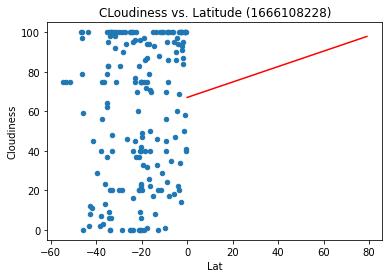

In [50]:
# Southern Hemisphere
(s_temp_slope, s_temp_intercept, s_temp_r_val, _, _) = linregress(southern_hemi_df["Lat"], 
                                                           southern_hemi_df["Cloudiness"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

s_temp_axes = southern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Cloudiness", 
                 title="CLoudiness vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

s_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_temp_slope, s_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_temp_r_val))
s_temp_axes.get_figure().savefig("../output_data/CLoudiness_vs_Latitude_S_Hemisphere.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The equation of the best-fit linear regression line for this chart is y=0.02x+2.80
The r-squared correlation coefficient for this line is 0.17


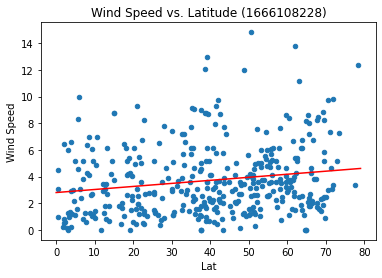

In [51]:
# Northern Hemisphere
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemi_df["Lat"], 
                                                           northern_hemi_df["Wind Speed"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Wind Speed", 
                 title="Wind Speed vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_N_Hemisphere.png")


The equation of the best-fit linear regression line for this chart is y=-0.05x+3.14
The r-squared correlation coefficient for this line is -0.25


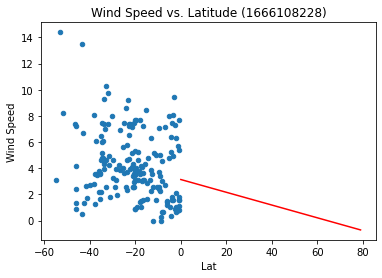

In [52]:
# Southern Hemisphere
(s_temp_slope, s_temp_intercept, s_temp_r_val, _, _) = linregress(southern_hemi_df["Lat"], 
                                                           southern_hemi_df["Wind Speed"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = s_temp_slope * regr_line_x + s_temp_intercept

s_temp_axes = southern_hemi_df.plot(kind="scatter", 
                 x="Lat", 
                 y="Wind Speed", 
                 title="Wind Speed vs. Latitude ({})".format(str(city_data_df["Date"].iloc[0]).split(",")[0])
                )                        

s_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(s_temp_slope, s_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(s_temp_r_val))
s_temp_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_S_Hemisphere.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE